In [44]:
# Import all the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('/Users/kshit/Desktop/Python/Projects/Cleaned_data.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_state', 'same_state', 'age', 'Python', 'R_Std', 'spark',
       'aws', 'excel', 'Job_Title', 'Seniority'],
      dtype='object')

In [4]:
# Choosing relevant column for our model

df_model=df[['Rating','job_state','Size','Type of ownership','Industry','Sector','Revenue','Hourly','Employer_provided','avg_salary',
       'same_state','age','Python','spark','aws','excel','Job_Title','Seniority']]

In [5]:
# Creating dummy data

df_dum = pd.get_dummies(df_model)

In [6]:
X=df_dum.drop('avg_salary', axis=1)
y=df_dum.avg_salary.values

In [9]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Now we will be building three different model and compare which model is most effecient. The models are as below:
        1. Multiple Linear Regression
        2. Lasso Regression
        3. Random Forest Regressor
We will also perform cross valiadation and calculate mean squared error to find which model is best among the three.

# Multiple Linear Regression
Multiple Linear Regression is a statistical model which allows us to predict the dependent variable based on the information provided by independent variable. 

In [16]:
Model_linear = LinearRegression()
Model_linear.fit(X_train, y_train)
np.mean(cross_val_score(Model_linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-8428166549.658371

# Lasso Regression
Lasso (Least Absolute Shrinkage and Selection Operator) is L1 reguralization that creates parsimonious models to enhance prediction accuracy and interpretability of the statistical model it produces.

In [14]:
Model_Lasso = Lasso()
Model_Lasso.fit(X_train, y_train)
np.mean(cross_val_score(Model_Lasso, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-21.011487446911065

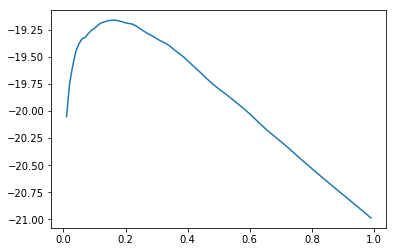

In [45]:
# Finding the optimum alpha for Lasso

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    mdl=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(mdl, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)))
    
plt.plot(alpha, error)

In [35]:
err = list(zip(alpha,error))
df_err=pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
15,0.16,-19.160301


In [36]:
# Setting alpha 0.16 for Lasso 

Model_Lasso=Lasso(0.16)
Model_Lasso.fit(X_train, y_train)
np.mean(cross_val_score(Model_Lasso, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-19.160301145462213

# Random Forest
Random Forest or random decision forest is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when building uncorrelated individual tree collectively whose prediction is more accurate than single decision tree. 

In [38]:
Model_RF = RandomForestRegressor()
np.mean(cross_val_score(Model_RF, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-15.228754923947392

In [40]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
GS = GridSearchCV(Model_RF, parameters, scoring='neg_mean_absolute_error', cv=3)
GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [41]:
GS.best_score_
GS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
# Test ensemble

Pred_lm = Model_linear.predict(X_test)
Pred_Lasso = Model_Lasso.predict(X_test)
Pred_RF = GS.best_estimator_.predict(X_test)

In [49]:
# Calculating Mean Squared Error

mean_squared_error(y_test, Pred_lm)

1.0781788948142556e+18

In [50]:
mean_squared_error(y_test, Pred_Lasso)

666.938272453619

In [51]:
mean_squared_error(y_test, Pred_RF)

345.5321285931693

From the above MSE, we can see that Random Forest has performed the best.